# Lab 1: Analysis on Traffic Accident

(Last update: 16/10/2023)

Name: Nguyễn Thị Minh Minh

Student ID: 21127528

---

## 1. Programming environment

- You will re-use the Linux environment setup in Lab 0 - WarmUp. Don't forget to start your coding environment (`conda activate min_ds-env`) before doing your assignment.
- Use Jupyter notebook or Jupyter lab, <font color=red>not Google Colab</font> (I can not grade you well on Google Colab) to edit your `*.ipynb` file.

In [1]:
import sys
sys.executable

'/root/miniconda3/envs/min_ds-env/bin/python'

- Import necessary libraries

In [2]:
import datetime
# YOUR CODE HERE (OPTION)
import numpy as np
import pandas as pd


## 2. Data collection

- You are required to do the following tasks using Linux command:
    - Create a folder named `./data`
    - Collect data from the the links that were specified in `links.txt` and save to `./data` using `wget`
    - After collecting data, rename your data as `data_2019.csv`, `data_2018.csv` and `guidance.csv` using `mv`
    - List all the file contained in `./data` using `ls`

In [3]:
# # YOUR CODE HERE
# raise NotImplementedError()

#IN THIS CELL, I CREATE A FOLDER AND DOWNLOAD URLS FROM 'links.txt'
!mkdir -p data
file = open('links.txt','r')
urls = file.read().strip().split('\n\n')

for url in urls:
    url = url.strip()
    !wget $url -P data/

file.close()

--2023-11-08 01:46:51--  https://datamillnorth.org/download/road-traffic-accidents/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv
Resolving datamillnorth.org (datamillnorth.org)... 216.24.57.253, 216.24.57.3
Connecting to datamillnorth.org (datamillnorth.org)|216.24.57.253|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /download/2o11d/8e6585f6-e627-4258-b16f-ca3858c0cc67 [following]
--2023-11-08 01:46:51--  https://datamillnorth.org/download/2o11d/8e6585f6-e627-4258-b16f-ca3858c0cc67
Reusing existing connection to datamillnorth.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://datapress-files.ams3.digitaloceanspaces.com/leeds/dataset/2o11d/2020-07-16T10%3A17%3A59/Traffic%20accidents_2019_Leeds.csv?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Content-Sha256=UNSIGNED-PAYLOAD&X-Amz-Credential=PGFSIURNB2RGEURH2EBZ%2F20231107%2Fams3%2Fs3%2Faws4_request&X-Amz-Date=20231107T184653Z&X-Amz-Expires=21600&X-Amz-Signat

In [4]:
# # YOUR CODE HERE
# raise NotImplementedError()

# IN THIS CELL, I RENAME FILE AND LIST ALL THE FILE CONTAINED IN './data'
!cd data && mv 'RTC 2018_Leeds.csv' data_2018.csv
!cd data && mv 'Traffic accidents_2019_Leeds.csv' data_2019.csv
!cd data && mv accidentsguidance.csv guidance.csv

!cd data && ls

data_2018.csv  data_2019.csv  guidance.csv


## 3. Data exploring & Data preprocessing

### 3.0. Read data

- First, I suggest you check the downloaded data by yourself before handing on the code. What kind of the data that you have just downloaded? What is the meaning of each file?

YOUR ANSWER HERE: They are tabular data, which contain information about traffic accidents in UK from 2018 to 2019. Additionally, there is a file that explains the notions in 2 data files.

- After checking the data, design a function named `read_data` with the name of data file as parameter, which returns a dictionary. Each element of this dictionary follows:
    - Key: Name of the columns
    - Value: Lists which contains the data of the corresponding columns

In [5]:
def read_data(file_name):
    # # YOUR CODE HERE
    # raise NotImplementedError()
    file = open(file_name, 'r', encoding = 'utf-8-sig')
    cols = {}

    key_values = file.readline().strip().split(',')
    for key_value in key_values:
        cols[key_value] = []
    for line in file:
        line_vals = line.strip().split(',')
        for i in range(len(line_vals)):
            cols[key_values[i]].append(line_vals[i])

    file.close()
    return cols
    

data_2018 = read_data('./data/data_2018.csv')
data_2019 = read_data('./data/data_2019.csv')

In [6]:
# TEST
assert set(data_2018.keys()) == set(['Accident Fields_Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Fields_Reference Number', 'Vehicle Number', 'Type of Vehicle', 'Casualty Fields_Reference Number', 'Casualty Veh No', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'])
assert set(data_2019.keys()) == set(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Number', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'])

id_col_len = len(data_2018['Accident Fields_Reference Number'])
for col_name in data_2018:
    assert len(data_2018[col_name]) == id_col_len
    
id_col_len = len(data_2019['Reference Number'])
for col_name in data_2019:
    assert len(data_2019[col_name]) == id_col_len

### 3.1. The meaning of each column/row

- Please refer to `./data/guidance.csv` in order to get the meaning of each column
- Each row corresponds to an accident with a unique reference number
- Compute the number of rows and columns and assign to `num_rows_2018`, `num_cols_2018`, `num_rows_2019`, `num_cols_2019`

In [7]:
# # YOUR CODE HERE
# raise NotImplementedError()
def read_guidance(file_path):
    file = open(file_path, 'r', encoding = 'utf-8-sig')
    for line in file:
        if not line or not line[0].strip():
            continue
        print(line.replace(',',':  '))
    file.close()

def calculate_row_column(data_2018, data_2019):
    num_cols_2018 = len(data_2018)
    num_rows_2018 = len(data_2018[list(data_2018.keys())[0]])

    num_cols_2019 = len(data_2019)
    num_rows_2019 = len(data_2019[list(data_2019.keys())[0]])
    
    return num_cols_2018, num_rows_2018, num_cols_2019, num_rows_2019

num_cols_2018, num_rows_2018, num_cols_2019, num_rows_2019 = calculate_row_column(data_2018, data_2019)
print(num_cols_2018, num_rows_2018, num_cols_2019, num_rows_2019)
# read_guidance('./data/guidance.csv')

21 1995 18 1907


In [8]:
# TEST
assert (num_rows_2018, num_cols_2018, num_rows_2019, num_cols_2019) == (1995, 21, 1907, 18)

### 3.2. Duplicated columns

- Observe the data in 2018, you can see that columns `Accident Fields_Reference Number`, `Vehicle Fields_Reference Number` and `Casualty Fields_Reference Number` seem to contain quite similar data.

- Additionally, columns `Number of Vehicles` and `Vehicle Number` in `data_2018` and `data_2019` also look quite similar.

- In order to make sure of these hypothesises, you have to check these columns. Your mission is to design a function named `check_similarity` in order to check the similarity (in percentage) of 2 given columns.
- The percentage of similarity is computed by dividing the number of similar samples to total samples. `check_similarity` return a number illustrating the similarity of 2 columns.


In [9]:
def check_similarity(data, col_name_1, col_name_2):
    # # YOUR CODE HERE
    # raise NotImplementedError()
    similar_sample = 0
    for i in range(len(data[col_name_1])):
        if data[col_name_1][i] == data[col_name_2][i]:
            similar_sample += 1
    return similar_sample/len(data[col_name_1])

check_similarity(data_2019, 'Number of Vehicles', 'Vehicle Number')

0.6754063974829575

In [10]:
# TEST
assert round(check_similarity(data_2018, 'Accident Fields_Reference Number', 'Vehicle Fields_Reference Number'),5) == 1.
assert round(check_similarity(data_2018, 'Accident Fields_Reference Number', 'Casualty Fields_Reference Number'),5) == 1.
assert round(check_similarity(data_2018, 'Number of Vehicles', 'Vehicle Number'), 5) == 0.65213
assert round(check_similarity(data_2019, 'Number of Vehicles', 'Vehicle Number'), 5) == 0.67541

- Therefore, column `Accident Fields_Reference Number`, `Vehicle Fields_Reference Number` and `Casualty Fields_Reference Number` contain the same data. We have to remove 2 of them.
- It could be noise for us to analyze 2 columns with more than 65% similarity, so I also decide to remove `Vehicle Number`.
- Since removing an element from a dictionary is a really hard task for beginner, I will help you on that.

In [11]:
del data_2018['Vehicle Fields_Reference Number'], data_2018['Casualty Fields_Reference Number']
del data_2019['Vehicle Number'], data_2018['Vehicle Number']

### 3.3. Data merging & Data checking

- In order for us to conveniently analyze the data, we should merge 2 data sets into 1.
- Compare the columns of 2 data sets, you can see that there are some unmergeable columns:
    - Column `Casualty Veh No` in `data_2018`: `data_2019` does not have one, so we have to remove this column from `data_2018`
    - Column `Accident Fields_Reference Number` in `data_2018` should be changed to `Reference Number`
- I will help you on these 2 tasks, then you will merge 2 data sets into `data_18_19`

In [12]:
# delete `Casualty Veh No` in data_2018
del data_2018['Casualty Veh No']

# rename
data_2018['Reference Number'] = data_2018.pop('Accident Fields_Reference Number')

In [13]:
# TEST
assert set(data_2018.keys()) == set(data_2019.keys())

In [14]:
# # YOUR CODE HERE
# raise NotImplementedError()
data_18_19 = {}
for key, val in data_2018.items():
    data_18_19[key] = data_2018[key] + data_2019[key]
    

- After merging 2 data sets, you have to check whether there is any duplicated row based on the ID of each case. If there is, it should be removed from the dataset.

In [15]:
id_col = data_18_19['Reference Number']
num_duplicated = len(id_col) - len(set(id_col))

print(f'Duplicated rows: {"True" if num_duplicated > 0 else "False"}. Number of duplicated rows: {num_duplicated}')

Duplicated rows: True. Number of duplicated rows: 904


In [16]:
# # YOUR CODE HERE
# raise NotImplementedError()
id_set = set() 
temp = {}

for key in data_18_19.keys():
    temp[key] = []

for i in range(len(data_18_19['Reference Number'])):
    if data_18_19['Reference Number'][i] not in id_set:
        for key in data_18_19.keys():
            temp[key].append(data_18_19[key][i])
            id_set.add(data_18_19['Reference Number'][i])
            
data_18_19 = temp.copy()


In [17]:
# TEST
assert set(data_18_19.keys()) == set(data_2018.keys())
assert len(set(data_18_19['Reference Number'])) == len(data_18_19['Reference Number'])
assert len(data_18_19['1st Road Class']) == 2998

- You also have to check if there is any missing data. For missing data, I suggest you to fill in since there are a lot of methods to handle it. But if the missing data for a column becomes too much (e.g. more than 50%), you should consider to remove the column out of the dataset.

- In this assignment, you will check missing data for each column. Result will be stored in a dictionary named `check_missing_data` which the key is column name and the value is `True` (some data is missing), `False` (no missing data).

In [18]:
# # YOUR CODE HERE
# raise NotImplementedError()
check_missing_data = {}
for key in data_18_19.keys():
    check_missing_data[key] = False
    
for key in data_18_19.keys():
    for i in range(len(data_18_19['Reference Number'])):
        if data_18_19[key][i] == '':
            check_missing_data[key] = True
            break


In [19]:
# TEST
assert set(check_missing_data.keys()) == set(data_18_19.keys())
for col in check_missing_data.keys():
    assert check_missing_data[col] == False

### 3.4. Data conversion

- Obverse the datatype of each column

In [20]:
for col in data_18_19.keys():
    print(f'{col:25} {type(data_18_19[col][0])}')

Grid Ref: Easting         <class 'str'>
Grid Ref: Northing        <class 'str'>
Number of Vehicles        <class 'str'>
Accident Date             <class 'str'>
Time (24hr)               <class 'str'>
1st Road Class            <class 'str'>
1st Road Class & No       <class 'str'>
Road Surface              <class 'str'>
Lighting Conditions       <class 'str'>
Weather Conditions        <class 'str'>
Local Authority           <class 'str'>
Type of Vehicle           <class 'str'>
Casualty Class            <class 'str'>
Casualty Severity         <class 'str'>
Sex of Casualty           <class 'str'>
Age of Casualty           <class 'str'>
Reference Number          <class 'str'>


- Before moving to analyzing the dataset, the datatype of each column should be correct.
- Based on `./data/guidance.csv` and research on the Internet:
    - `Grid Ref` values are coordinate location in UK format $\to$ Datatype: int
    - `Number of Vehicles`: int
    - `Accident Date`: datetime
    - `Time (24hr)`: datetime
    - `Age of Casualty`: int
    - `1st Road Class`: str
    - Rest: str
    
- In reallife project, you have to convert all columns into their correct datatype before doing anything else. But in this assignment, you are just required to merge `Time (24hr)` and `Accident Date` into column `Full time` with the correct datatype (datetime). After merging, delete `Time (24hr)` and `Accident Date`.
    - The format of `Time (24hr)`: `hhmm`
    - The format of `Accident Date`: `dd/mm/yyyy`

In [21]:
# # YOUR CODE HERE
# raise NotImplementedError()
fulltime_val = []
for i in range(len(data_18_19['Reference Number'])):
    acci_date = data_18_19['Accident Date'][i]
    time = data_18_19['Time (24hr)'][i]
    acci_date = acci_date.split('/')
    if len(time) != 4:
        time = z.fill(4)
    full_time = datetime.datetime(int(acci_date[2]), int(acci_date[1]), int(acci_date[0]), int(time[:2]), int(time[2:]))
    fulltime_val.append(full_time)

data_18_19['Full time'] = fulltime_val

del data_18_19['Time (24hr)'], data_18_19['Accident Date']


In [22]:
# TEST
assert set(data_18_19.keys()) == set(['Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty', 'Reference Number', 'Full time'])
assert type(data_18_19['Full time'][0]) == datetime.datetime

## 4. Questions proposing & answering

- In this section, we are going to propose 2 questions that can be answered by data. I will propose 1 question. The other one will be your task.
- Note that answering these questions should give us some insight or useful information about traffic in UK.

### 4.1. Question #1

- How many accidents are there in each day of a week (Mon $\to$ Sun) and in each hour of a day (0 $\to$ 23)?
- Meaning: Warn people to be careful when participating in traffic during those hours
- Answer:
    - Firstly, you will create a `matrix_` size $7\times24$ which each element indicates he number of accidents during a certain hour of a certain day of the week. E.g. `matrix_[1][7]` indicates the number of accidents from 7h00m to 7h59m of Tuesday
    - Then, you will fill in the matrix based on the column `Full time` that you have just created
    - Finally, I will help you visualize the result

In [23]:
# # YOUR CODE HERE
# raise NotImplementedError()
matrix_ = np.zeros((7,24), dtype = int)
day_in_week = [time.strftime("%A") for time in data_18_19['Full time']]
hour_in_day = [hour.hour for hour in data_18_19['Full time']]
day_order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day, hour in zip(day_in_week, hour_in_day):
    matrix_[day_order.index(day)][hour] += 1

matrix_


array([[ 9,  2,  4,  4,  5,  4,  6, 22, 25, 24, 20, 12, 17, 20, 35, 54,
        38, 42, 24, 17, 16,  6,  8,  4],
       [ 4,  1,  2,  1,  1,  6,  6, 28, 44, 24, 23, 17, 14, 28, 23, 41,
        44, 43, 32, 22, 12,  7,  8,  5],
       [ 3,  2,  0,  4,  2,  4,  6, 33, 46, 21, 18, 20, 17, 19, 27, 38,
        41, 52, 34, 28, 17, 15, 13,  7],
       [ 4,  2,  2,  0,  3,  0, 13, 34, 42, 29, 20, 20, 17, 30, 29, 37,
        43, 39, 43, 32, 19, 17, 10,  7],
       [ 4,  1,  0,  0,  2,  1, 13, 26, 39, 23, 23, 18, 21, 31, 35, 42,
        51, 42, 32, 29, 21, 20, 14, 18],
       [13,  9,  7,  4,  5,  4,  0,  5,  2, 17, 17, 22, 27, 26, 22, 28,
        27, 30, 24, 30, 20, 11, 13, 11],
       [14,  6,  8,  1,  7,  6,  2,  4,  6, 14, 10, 21, 24, 19, 12, 30,
        20, 19, 27, 18, 10, 14,  9,  4]])

Text(0.5, 1.0, 'Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

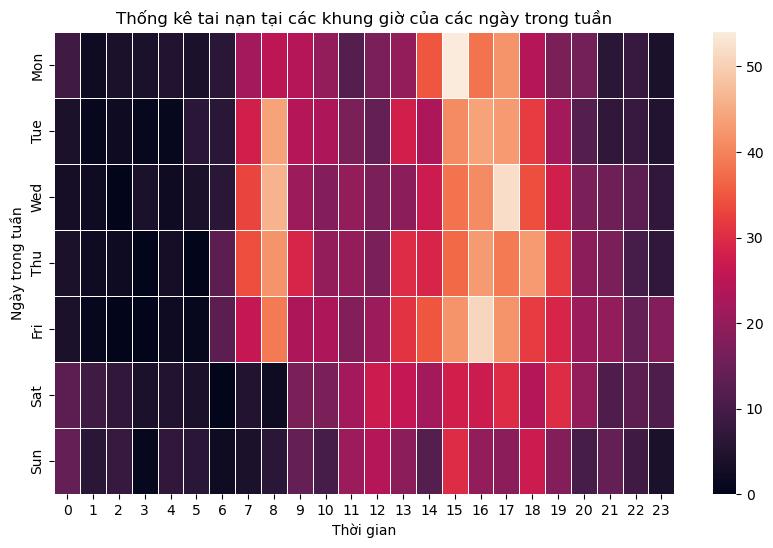

In [24]:
# visualize
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix_, linewidths=.5, yticklabels = day_of_week)
ax.set_xlabel('Thời gian')
ax.set_ylabel('Ngày trong tuần')
ax.set_title('Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

**ANSWER**
* From illustration, you can clearly see that certain time slots on specific days see the most traffic accidents. This includes 4 PM (16h) on Fridays, 5 PM (17h) on Wednesdays, and 3 PM (15h) on Mondays. I believe the common thread here is that these are rush hours after a long day at work. As a result, people tend to be in a hurry to get home, which may contribute to the higher accident rates during these times.
* From Tuesday to Friday, the average number of accidents remains quite high, usually between 3 PM and 5 PM..
* Given this awareness of the high accident times, I'd suggest being extra cautious and attentive when traveling during these hours to ensure safety on the road.

### 4.2. Question #2

YOUR ANSWER HERE

- Question: How weather conditions, road surface problem affect on casualty severity ?
- Meaning: By recognizing the severity level of accidents influenced by weather conditions and road surface status, people would make wiser decisions about going out, taking into consideration the weather, and strive to improve the quality of road surfaces for safety. 

In [25]:
import pandas as pd
anotation_frame = {'Road Surface':['Dry', 'Wet/Damp', 'Snow', 'Frost/Ice', 'Flood (surface water over 3cm deep)','None','None','None','None'],
                   'Weather Conditions': ['Fine without high winds','Raining without high winds','Snowing without high winds','Fine with high winds',
                                          'Raining with high winds','Snowing with high winds','Fog or mist – if hazard','Other','Unknown'],
                                          'Casualty Severity':['Fatal', 'Serious', 'Slight','None','None','None','None','None','None']}
ano = pd.DataFrame(anotation_frame)
ano.index = ano.index + 1
ano

,Road Surface,Weather Conditions,Casualty Severity
1,Dry,Fine without high winds,Fatal
2,Wet/Damp,Raining without high winds,Serious
3,Snow,Snowing without high winds,Slight
4,Frost/Ice,Fine with high winds,None
5,Flood (surface water over 3cm deep),Raining with high winds,None
6,None,Snowing with high winds,None
7,None,Fog or mist – if hazard,None
8,None,Other,None
9,None,Unknown,None


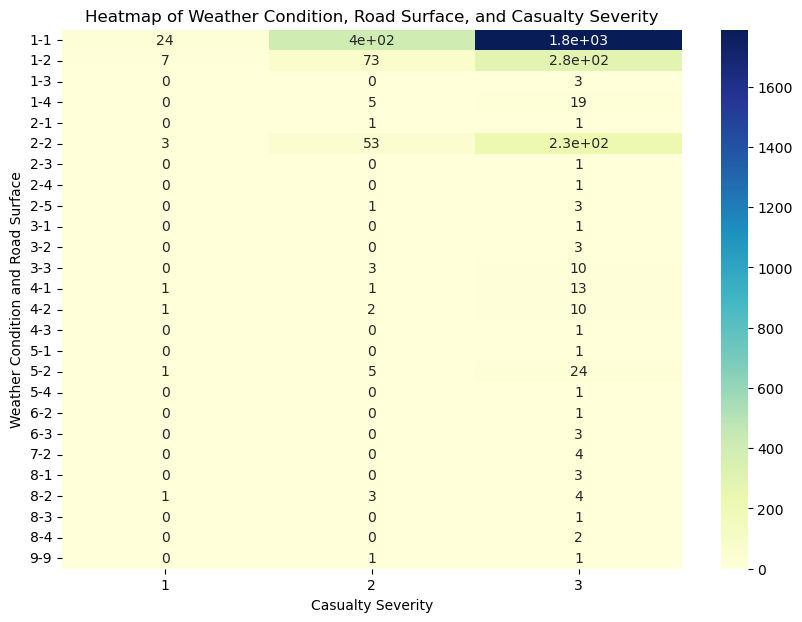

In [26]:
# YOUR CODE HERE
# raise NotImplementedError()

dataframe_18_19 = pd.DataFrame(data_18_19)
a = pd.crosstab([dataframe_18_19['Weather Conditions'],dataframe_18_19['Road Surface']], dataframe_18_19['Casualty Severity'])
plt.figure(figsize=(10, 7))  
sns.heatmap(a, annot=True, cmap="YlGnBu")

plt.title('Heatmap of Weather Condition, Road Surface, and Casualty Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Weather Condition and Road Surface')
plt.show()

**ANSWER**
* From the illustration, it is quite positive to observe that most of the accidents is at slight degree with 1800 cases, happened with dry road surface and fine without high winds. Slight accidents are also popular with 280 cases in the condition of fine without high winds, wet/damp roads and 230 case with raining without high winds, wet/ damp road.
* With serious accidents, about 400 cases happened in good condition weather. Similarly, although in good condition: dry road and fine without high winds, 24 accidents cause fatality. The data has told the story that in most case of serious problems, the core factor don't lie in external factors but the awareness of traffic participants themselves.
* In addition, a significant number of accidents occurred during rainy weather, when roads were wet and damp. These conditions could potentially impact the driver's ability to properly control their vehicles, leading to unexpected issues.
* In conclusion, I highly recommend that everyone to stay alert while on the road. It’s also advisable to avoid driving in bad weather conditions like rain, which can make the roads wet and potentially dangerous.